In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
import numpy as np

get_and_select_excels_in_subfolders_function

In [3]:
def get_select_excels(path, substring):
    b_s_files_list = []
    for root, directories, files in os.walk(path):
        for name in files:
            b_s_files_list.append(os.path.join(root, name))
    b_s_matching_excels = [a for a in b_s_files_list if substring in a]
    return b_s_matching_excels

Ratio calculation function

In [4]:
def statement_ratio(df, ratio_col ,ratio_title, date_col,value_col, sel_date, tot_ass_title):
    
    a = df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col].index[0]].replace(',','')

    b = df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col].index[0]].replace(',','')
    try:
        ratio = int(a)/int(b)
        
    except:
        a = a.replace(')','').replace('(','')
        a = int(a)*(-1)
        ratio = a/int(b)
        
    return ratio

ratio_to_df_function

In [5]:
def b_s_ratio_func(path , col_head, balance_ratio_df):
    b_s_df = pd.read_excel(path)
    a = balance_ratio_df.append(
        b_s_df[col_head[0:2]].drop_duplicates().loc[0,:].append(
        pd.Series(col_head[2:9],index=col_head[2:9]).apply(
        lambda x: statement_ratio(b_s_df,'description', x, 'date', 'value', '1399-12-30', 'total_assets'))),
        ignore_index=True)
    return a

In [6]:
def p_l_ratio_df_func(path , col_head, profit_lost_ratio_df):
    p_l_df = pd.read_excel(path)
    b = profit_lost_ratio_df.append(
        p_l_df[col_head[0:2]].drop_duplicates().loc[0,:].append(
        pd.Series(col_head[9:14],index=col_head[9:14]).apply(
        lambda x: statement_ratio(p_l_df,'description', x, 'date', 'value', '1399-12-30', 'operating_Income'))),
        ignore_index=True)
    return b

In [7]:
col_head = ['nemad',
            'national_code',
            'cash',
            'comercial_and_other_receivables',
            'inventories', 'tangible_fixed-assets',
            'comercial_payables_and_other_payables',
            'total_equity',
            'long_term_loans',
            'cost_of_operating_income',
            'financial_costs',
            'current_year',
            'last_year',
            'net_profit']

gathering_excels_direction

In [8]:
b_s_path = r'D:\Data\codal_clean_balance_sheet-20220228T083811Z-001\codal_clean_balance_sheet'
p_l_path = r'D:\Data\codal_clean_profit_loss-20220228T084420Z-001\codal_clean_profit_loss'
b_s_matching_excels = get_select_excels(b_s_path , '1399-12-30_audited_balancesheet')
p_l_matching_excels = get_select_excels(p_l_path ,'1399-12-30_audited_profit_loss' )

ratio calculation for all stocks

In [9]:
def cal_rat_for_all_stocks_function(match_paths, col_head, func, b_s):
    failed = []
    if b_s==0:
        ratio_df = pd.DataFrame(columns=col_head[0:9])
        ratio_df1 = pd.DataFrame(columns=col_head[0:9])
        for i in match_paths:
            try:
                ratio_df = ratio_df.append(func(i, col_head, ratio_df1))
            except:
                failed.append(i)
    else:
        ratio_df = pd.DataFrame(columns=col_head[0:2]+col_head[9:15])
        ratio_df1 = pd.DataFrame(columns=col_head[0:2]+col_head[9:15])
        for i in match_paths:
            try:
                ratio_df = ratio_df.append(func(i, col_head, ratio_df1))
            except:
                failed.append(i)
    return [ratio_df.drop_duplicates(subset=['national_code']), failed]

In [10]:
s_b_df1 = cal_rat_for_all_stocks_function(b_s_matching_excels, col_head, b_s_ratio_func, 0)

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\56079920.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col].index[0]].replace(',','')
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\56079920.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col].index[0]].replace(',','')
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\3931209485.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b_s_df[col_head[0:2]].drop_duplicates().loc[0,:].append(
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\3931209485.py:3: FutureWarning: The frame.append method is deprecate

In [11]:
p_l_df1 = cal_rat_for_all_stocks_function(p_l_matching_excels, col_head, p_l_ratio_df_func, 1)

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\56079920.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==ratio_title][value_col].index[0]].replace(',','')
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\56079920.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col][df[df[date_col]==sel_date][df[ratio_col]==tot_ass_title][value_col].index[0]].replace(',','')
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\3128067821.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_l_df[col_head[0:2]].drop_duplicates().loc[0,:].append(
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_1404\3128067821.py:3: FutureWarning: The frame.append method is deprecate

final dataframe for clustering 

In [12]:
b_s_p_l_ratio_df = s_b_df1[0].merge(p_l_df1[0], how='left', on='national_code')
finally_ratio_df = b_s_p_l_ratio_df.dropna().drop(columns=['nemad_y'])

In [43]:
finally_ratio_df.to_excel('finally_ratio_df.xlsx')

describing data and correlation

In [15]:
#this function is for transtorming float to numpy.float64
def np_float_function(df, cols):
    for i in cols:
        df[i] = df[i].apply(lambda x: float(x))
    return df

In [16]:
ratio_df_for_clustering = np_float_function(finally_ratio_df,['cash', 'comercial_and_other_receivables',
       'inventories', 'tangible_fixed-assets',
       'comercial_payables_and_other_payables', 'total_equity',
       'long_term_loans', 'cost_of_operating_income', 'financial_costs',
       'current_year', 'last_year', 'net_profit']).reset_index(drop=True)

In [17]:
ratio_df_for_clustering.describe()

,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.063219,0.259166,0.193904,0.292510,0.209673,0.546062,0.024435,-0.665474,-0.368567,-0.028612,-0.005166,-0.042006
std,0.089794,0.183990,0.163539,0.253118,0.156606,0.195043,0.069859,0.209312,3.179336,0.043136,0.017845,3.341743
min,0.000261,0.006665,0.000000,0.000480,0.018359,-0.190396,0.000000,-1.162891,-30.851710,-0.305684,-0.143370,-31.898657
25%,0.014943,0.099035,0.071536,0.078912,0.088681,0.442319,0.000000,-0.817629,-0.039646,-0.038066,-0.001219,0.125769
50%,0.033742,0.229978,0.160180,0.181029,0.162471,0.536603,0.000000,-0.694289,-0.010159,-0.017925,0.000000,0.245958
75%,0.067414,0.355239,0.288512,0.494921,0.292828,0.690806,0.004036,-0.543895,-0.001313,-0.000016,0.000000,0.431463
max,0.649352,0.791451,0.716036,0.972799,0.695286,0.941123,0.364054,0.000000,0.000000,0.000000,0.006551,1.825349


In [18]:
ratio_df_for_clustering.corr()

,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
cash,1.000000,-0.049362,0.007288,-0.222270,-0.159962,0.251181,-0.132856,0.189433,0.078362,-0.037361,0.139913,0.086692
comercial_and_other_receivables,-0.049362,1.000000,-0.134994,-0.499601,0.182205,-0.191394,-0.124638,0.007066,0.079547,-0.143990,-0.082789,0.086355
inventories,0.007288,-0.134994,1.000000,-0.447840,0.186059,-0.031786,-0.161300,-0.224454,0.126734,0.181852,-0.085874,0.099963
tangible_fixed-assets,-0.222270,-0.499601,-0.447840,1.000000,-0.131048,0.055845,0.206524,-0.133444,-0.222716,0.069570,0.174413,-0.229150
comercial_payables_and_other_payables,-0.159962,0.182205,0.186059,-0.131048,1.000000,-0.616257,-0.087035,-0.386990,-0.181566,0.234845,-0.082309,-0.218473
total_equity,0.251181,-0.191394,-0.031786,0.055845,-0.616257,1.000000,-0.312369,0.376621,0.032783,-0.152014,0.149540,0.063165
long_term_loans,-0.132856,-0.124638,-0.161300,0.206524,-0.087035,-0.312369,1.000000,-0.130755,0.022694,0.133545,-0.019966,0.014916
cost_of_operating_income,0.189433,0.007066,-0.224454,-0.133444,-0.386990,0.376621,-0.130755,1.000000,0.017195,-0.387679,-0.163288,0.080880
financial_costs,0.078362,0.079547,0.126734,-0.222716,-0.181566,0.032783,0.022694,0.017195,1.000000,-0.073547,-0.012127,0.994243
current_year,-0.037361,-0.143990,0.181852,0.069570,0.234845,-0.152014,0.133545,-0.387679,-0.073547,1.000000,-0.104962,-0.117996


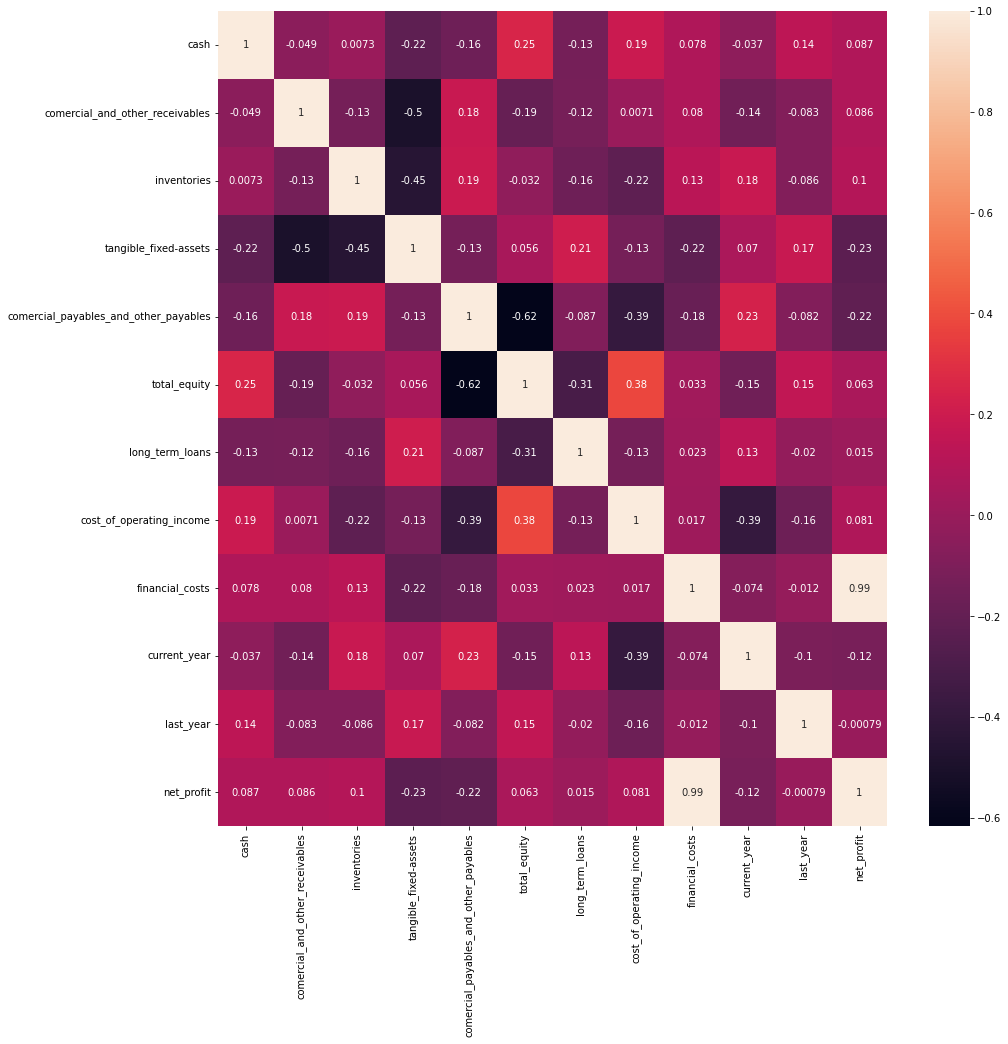

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(ratio_df_for_clustering.corr(), annot=True)
plt.show()

In [20]:
rho = ratio_df_for_clustering.corr()
pval = ratio_df_for_clustering.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
cash,1.0***,-0.049,0.007,-0.222**,-0.16,0.251**,-0.133,0.189*,0.078,-0.037,0.14,0.087
comercial_and_other_receivables,-0.049,1.0***,-0.135,-0.5***,0.182*,-0.191*,-0.125,0.007,0.08,-0.144,-0.083,0.086
inventories,0.007,-0.135,1.0***,-0.448***,0.186*,-0.032,-0.161,-0.224**,0.127,0.182*,-0.086,0.1
tangible_fixed-assets,-0.222**,-0.5***,-0.448***,1.0***,-0.131,0.056,0.207**,-0.133,-0.223**,0.07,0.174*,-0.229**
comercial_payables_and_other_payables,-0.16,0.182*,0.186*,-0.131,1.0***,-0.616***,-0.087,-0.387***,-0.182*,0.235**,-0.082,-0.218**
total_equity,0.251**,-0.191*,-0.032,0.056,-0.616***,1.0***,-0.312***,0.377***,0.033,-0.152,0.15,0.063
long_term_loans,-0.133,-0.125,-0.161,0.207**,-0.087,-0.312***,1.0***,-0.131,0.023,0.134,-0.02,0.015
cost_of_operating_income,0.189*,0.007,-0.224**,-0.133,-0.387***,0.377***,-0.131,1.0***,0.017,-0.388***,-0.163,0.081
financial_costs,0.078,0.08,0.127,-0.223**,-0.182*,0.033,0.023,0.017,1.0***,-0.074,-0.012,0.994***
current_year,-0.037,-0.144,0.182*,0.07,0.235**,-0.152,0.134,-0.388***,-0.074,1.0***,-0.105,-0.118


# Traditional Clustering Algorithms

## Partition clustering:

### K_means:

import necessary modules

In [21]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [28]:
kmeans = KMeans(
  init='random',
  n_clusters=4,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [64]:
# Droping 88th record because this is outlier
ratio_df_for_clustering1 = ratio_df_for_clustering.drop(labels=88).reset_index(drop=True)

In [69]:
ratio_df_without_strings = ratio_df_for_clustering1[col_head[2:]]

In [74]:
kmeans.fit(ratio_df_without_strings)

KMeans(init='random', n_clusters=4, random_state=42)

In [75]:
#the lowest SSE value
kmeans.inertia_

19.29299749442635

In [76]:
#Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.17613114e-01,  3.01663118e-01,  1.17568957e-01,
         1.89474766e-01,  1.09836603e-01,  7.02968302e-01,
         4.06618897e-03, -4.42310646e-01, -1.50380653e-02,
        -4.31397132e-02, -2.98806481e-03,  6.04047420e-01],
       [ 3.85688125e-02,  3.64992857e-01,  1.26883088e-01,
         2.55922716e-01,  1.38422990e-01,  5.33217602e-01,
         0.00000000e+00, -4.99925368e-01, -1.17771893e-02,
        -1.21134070e-01, -4.27076464e-03,  1.56987117e+00],
       [ 4.30512602e-02,  1.38778631e-01,  1.18943213e-01,
         5.88448678e-01,  1.84989181e-01,  5.48267221e-01,
         4.61090978e-02, -7.48947647e-01, -5.85646494e-02,
        -2.25434047e-02, -1.39083704e-03,  1.77229469e-01],
       [ 5.29548692e-02,  3.24323903e-01,  3.02774347e-01,
         1.09469130e-01,  2.80938828e-01,  4.62140905e-01,
         2.12366064e-02, -7.33247827e-01, -4.32190219e-02,
        -1.90735081e-02, -9.44486561e-03,  1.34323264e-01]])

In [77]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [78]:
kmeans.labels_

array([2, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3, 0, 3, 3, 3, 3, 0, 0, 2, 3, 2, 0,
       3, 0, 3, 2, 3, 3, 3, 2, 3, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 2, 3, 2, 3, 0, 3, 3,
       2, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 3, 0,
       2, 0, 3, 2, 2])

In [313]:
kmeans_clusters = []
kmeans_clusters.append(pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==0].index)
kmeans_clusters.append(pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==1].index)
kmeans_clusters.append(pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==2].index)
kmeans_clusters.append(pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==3].index)


In [84]:
ratio_df_for_clustering1.loc[pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==0].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
3,aria,10320053498,0.148783,0.399066,0.125149,0.124488,0.070729,0.832699,0.000000,-0.446805,0.000000,-0.014353,0.000000,0.613778
11,dejaber,10100339921,0.011973,0.629791,0.132075,0.054537,0.084405,0.523284,0.000000,-0.645285,-0.100678,-0.038500,-0.007302,0.497127
16,fameli,10100582059,0.050378,0.267157,0.128634,0.269855,0.133358,0.794367,0.000000,-0.321207,-0.001198,-0.022103,0.000000,0.616876
17,farabours,10103749172,0.001934,0.028323,0.000000,0.302508,0.108873,0.791088,0.000000,0.000000,0.000000,-0.162779,-0.005100,0.955441
21,feroi,10260124447,0.067814,0.515242,0.207211,0.149125,0.018359,0.941123,0.000000,-0.484146,-0.001238,-0.000634,-0.000156,0.774555
23,foolad,10260289464,0.052447,0.309436,0.304431,0.073268,0.064223,0.661647,0.000000,-0.524913,-0.039072,-0.032088,-0.009774,0.494518
32,gheshahdab,10380222768,0.007505,0.202799,0.180727,0.045183,0.063620,0.798999,0.000000,-0.834104,-0.028457,-0.024542,0.000000,0.584646
34,ghesino,10460002140,0.017554,0.345605,0.140111,0.304599,0.097088,0.678128,0.000000,-0.708187,-0.033599,-0.048860,-0.000774,0.884303
42,kechad,10101887744,0.356066,0.165510,0.103407,0.150899,0.119959,0.802012,0.000000,-0.364326,-0.000229,-0.055375,0.000000,0.654658
43,kegol,10860515050,0.038909,0.277080,0.143991,0.148488,0.123393,0.718775,0.035460,-0.519098,-0.010138,-0.033154,-0.008824,0.439142


In [85]:
ratio_df_for_clustering1.loc[pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==1].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
35,hafari,10101920830,0.038114,0.791451,0.021305,0.055599,0.295052,0.509609,0.0,-0.590178,-0.024885,-0.305684,0.000000,1.282389
40,kama,10260293195,0.059340,0.263413,0.182989,0.082150,0.084694,0.841170,0.0,-0.329498,-0.010447,-0.000907,-0.000039,1.825349
48,khebonyan,10200054270,0.018252,0.040114,0.176355,0.630019,0.035523,0.248874,0.0,-0.580100,0.000000,-0.056812,-0.012774,1.601876


In [86]:
ratio_df_for_clustering1.loc[pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==2].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
0,aabada,10860410234,0.022283,0.049415,0.016382,0.905991,0.244841,0.581821,0.000000,-0.573806,-0.004150,0.000000,0.000000,0.400830
1,aap,10460114292,0.063257,0.207989,0.127198,0.473992,0.208552,0.567429,0.039294,-0.960593,-0.007305,-0.000690,-0.001232,0.033403
2,akhaber,10103647290,0.023849,0.395504,0.003258,0.464182,0.286795,0.349495,0.022504,-1.109239,-0.053201,0.000000,0.000000,0.298423
5,begilan,10320476535,0.013947,0.182916,0.000000,0.751286,0.022877,0.628009,0.000000,-0.540475,0.000000,-0.107328,-0.000751,0.359025
7,bepeyvand,10320481010,0.010503,0.333799,0.024476,0.553600,0.103338,0.464265,0.000000,-0.494755,0.000000,-0.124542,0.000000,0.431997
8,beterans,10100433825,0.006555,0.289104,0.158916,0.417595,0.153270,0.604194,0.000000,-0.654013,-0.084110,-0.053712,-0.002664,0.348059
9,chefibr,10100429427,0.038050,0.064445,0.045150,0.606072,0.041484,0.869276,0.000000,-0.721594,-0.028721,0.000000,0.000000,0.277649
18,farak,10780016544,0.022444,0.246728,0.137524,0.454629,0.156471,0.517362,0.003440,-0.822485,-0.030929,-0.017257,0.000000,0.100003
20,fejahan,10630161649,0.059893,0.064630,0.214583,0.508842,0.168364,0.751877,0.016630,-0.659933,-0.077952,0.000000,-0.000114,0.243569
25,gekosar,10260145470,0.008368,0.011132,0.007230,0.972799,0.038262,0.906395,0.004031,-0.855359,-0.004701,0.000000,-0.021297,-0.391639


In [87]:
ratio_df_for_clustering1.loc[pd.Series(kmeans.labels_)[pd.Series(kmeans.labels_)==3].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
4,asp,10100518071,0.023737,0.253830,0.337874,0.015887,0.294838,0.443545,0.000000,-1.162891,0.000000,0.000000,-0.043939,-1.089917
6,bekab,10100967098,0.057358,0.355263,0.342388,0.057247,0.201703,0.481263,0.000000,-0.714893,-0.041269,-0.036764,0.000000,0.307393
10,kimiatech,10102335460,0.031244,0.338775,0.414684,0.073351,0.232384,0.468611,0.000000,-0.512272,-0.040934,-0.015212,0.000000,0.285843
12,desanko,10102350203,0.041327,0.549713,0.195846,0.086538,0.211781,0.254057,0.136729,-0.675816,-0.115015,-0.014885,-0.002234,0.102947
13,deshimi,10101725563,0.019185,0.196708,0.407656,0.115548,0.129907,0.504861,0.019857,-0.491753,-0.063733,-0.036532,-0.008537,0.329397
14,detolid,10102901102,0.015524,0.662152,0.213965,0.087862,0.151150,0.278309,0.000000,-0.628933,-0.077772,-0.039787,-0.024632,0.163140
15,dezahravi,10102328820,0.021846,0.459358,0.086001,0.293832,0.136276,0.308300,0.301994,-0.632365,-0.170701,-0.029735,-0.022746,0.102920
19,fegostar,10460093783,0.036748,0.706887,0.166665,0.070903,0.429655,0.473094,0.000000,-0.931492,-0.000818,-0.003214,0.000000,0.122513
22,fetosa,10320128841,0.028359,0.423831,0.394290,0.086682,0.496282,0.492365,0.000000,-0.837901,-0.004079,0.000000,0.000000,0.128838
24,gedona,14004707973,0.022800,0.342957,0.098324,0.286247,0.302193,0.529477,0.000000,-0.793455,-0.006095,-0.021851,0.000000,0.075262


#### A list holds the SSE values for each k

In [89]:
kmeans_kwargs = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42
}
# A list holds the SSE values for each k
sse=[]
for k in range(1,11):
    kmeans1 = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans1.fit(ratio_df_without_strings)
    sse.append(kmeans1.inertia_)

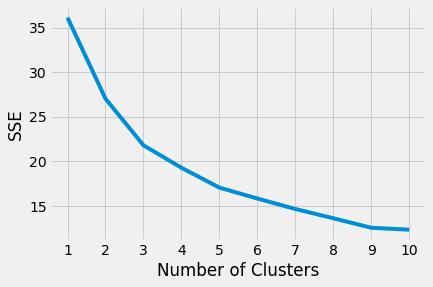

In [90]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [91]:
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
kl.elbow

3

#### A list holds the silhouette coefficients for each k

In [94]:
silouette_coefficients = []

# Notice you start at 2 clusters for silouette coefficient

for k in range(2,11):
    kmeans2 = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans2.fit(ratio_df_without_strings)
    score = silhouette_score(ratio_df_without_strings, kmeans2.labels_)
    silouette_coefficients.append(score)

In [275]:
kmeans2

KMeans(init='random', n_clusters=10, random_state=42)

In [276]:
len(silouette_coefficients)

9

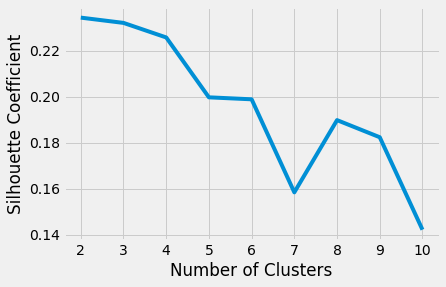

In [206]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11),silouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

### K_medoids

In [208]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [212]:
initial_medoids = kmeans_plusplus_initializer(ratio_df_without_strings.values.tolist(), 4).initialize(return_index=True)
kmedoids_instance = kmedoids(ratio_df_without_strings.values.tolist(), initial_medoids)
kmedoids_instance.process()
kmedoids_clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [213]:
kmedoids_clusters

[[35, 40, 48],
 [4,
  6,
  10,
  12,
  14,
  19,
  22,
  24,
  27,
  28,
  30,
  33,
  49,
  50,
  52,
  53,
  57,
  58,
  60,
  62,
  64,
  66,
  69,
  70,
  75,
  76,
  77,
  78,
  83,
  85,
  86,
  90],
 [3,
  8,
  11,
  13,
  16,
  17,
  21,
  23,
  26,
  32,
  34,
  42,
  43,
  44,
  45,
  46,
  47,
  51,
  54,
  56,
  63,
  65,
  68,
  71,
  72,
  74,
  79,
  80,
  82,
  87,
  89],
 [0,
  1,
  2,
  5,
  7,
  9,
  15,
  18,
  20,
  25,
  29,
  31,
  36,
  37,
  38,
  39,
  41,
  55,
  59,
  61,
  67,
  73,
  81,
  84,
  88,
  91,
  92]]

In [215]:
initial_medoids

[34, 52, 4, 0]

In [214]:
medoids

[40, 90, 43, 37]

### AffinityPropagation

In [128]:
from sklearn.cluster import AffinityPropagation

In [129]:
a_p_clustering = AffinityPropagation().fit(ratio_df_without_strings)

In [130]:
a_p_clustering.labels_

array([ 2,  4,  4,  0,  1,  2, 11,  2,  4,  2, 11,  0,  3, 11,  3,  3,  0,
       12,  4, 13,  4,  0, 13,  0,  4, 10,  3,  4, 13,  2, 11,  4, 11,  4,
        0,  5,  2,  4,  4,  2,  6,  4,  0,  0, 11,  0,  0,  2,  7, 11, 13,
       11,  9,  3, 11, 10,  0, 11,  3,  4, 13,  2, 11,  0,  8, 11,  9, 10,
       11, 11,  3, 11,  0,  4, 11, 13, 11, 13, 11, 11,  0,  4, 11, 13,  4,
        4,  3, 12,  9,  0, 13,  4,  4], dtype=int64)

In [131]:
pd.Series(a_p_clustering.labels_).unique()

array([ 2,  4,  0,  1, 11,  3, 12, 13, 10,  5,  6,  7,  9,  8],
      dtype=int64)

## Hierarchy Clustering

### Birch

In [132]:
from sklearn.cluster import Birch

In [146]:
birch_cluster = Birch(branching_factor=50, threshold=.05).fit(ratio_df_without_strings)

In [160]:
birch_cluster.labels_

array([2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 1, 0, 2, 2], dtype=int64)

In [222]:
ratio_df_for_clustering1.loc[pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==0].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
4,asp,10100518071,0.023737,0.253830,0.337874,0.015887,0.294838,0.443545,0.000000,-1.162891,0.000000,0.000000,-0.043939,-1.089917
6,bekab,10100967098,0.057358,0.355263,0.342388,0.057247,0.201703,0.481263,0.000000,-0.714893,-0.041269,-0.036764,0.000000,0.307393
8,beterans,10100433825,0.006555,0.289104,0.158916,0.417595,0.153270,0.604194,0.000000,-0.654013,-0.084110,-0.053712,-0.002664,0.348059
10,kimiatech,10102335460,0.031244,0.338775,0.414684,0.073351,0.232384,0.468611,0.000000,-0.512272,-0.040934,-0.015212,0.000000,0.285843
11,dejaber,10100339921,0.011973,0.629791,0.132075,0.054537,0.084405,0.523284,0.000000,-0.645285,-0.100678,-0.038500,-0.007302,0.497127
12,desanko,10102350203,0.041327,0.549713,0.195846,0.086538,0.211781,0.254057,0.136729,-0.675816,-0.115015,-0.014885,-0.002234,0.102947
13,deshimi,10101725563,0.019185,0.196708,0.407656,0.115548,0.129907,0.504861,0.019857,-0.491753,-0.063733,-0.036532,-0.008537,0.329397
14,detolid,10102901102,0.015524,0.662152,0.213965,0.087862,0.151150,0.278309,0.000000,-0.628933,-0.077772,-0.039787,-0.024632,0.163140
15,dezahravi,10102328820,0.021846,0.459358,0.086001,0.293832,0.136276,0.308300,0.301994,-0.632365,-0.170701,-0.029735,-0.022746,0.102920
19,fegostar,10460093783,0.036748,0.706887,0.166665,0.070903,0.429655,0.473094,0.000000,-0.931492,-0.000818,-0.003214,0.000000,0.122513


In [293]:
pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==0].index.tolist()

[4,
 6,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 19,
 22,
 23,
 26,
 27,
 28,
 30,
 32,
 43,
 44,
 49,
 50,
 51,
 52,
 53,
 54,
 57,
 58,
 60,
 62,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 78,
 79,
 82,
 83,
 86,
 90]

In [297]:
birch_clusters =[]

In [298]:
birch_clusters.append(pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==0].index.tolist())

In [299]:
birch_clusters.append(pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==1].index.tolist())

In [300]:
birch_clusters.append(pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==2].index.tolist())

In [301]:
birch_clusters

[[4,
  6,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  19,
  22,
  23,
  26,
  27,
  28,
  30,
  32,
  43,
  44,
  49,
  50,
  51,
  52,
  53,
  54,
  57,
  58,
  60,
  62,
  64,
  65,
  66,
  68,
  69,
  70,
  71,
  74,
  75,
  76,
  77,
  78,
  79,
  82,
  83,
  86,
  90],
 [3, 16, 17, 21, 34, 35, 40, 42, 46, 48, 56, 63, 72, 80, 87, 89],
 [0,
  1,
  2,
  5,
  7,
  9,
  18,
  20,
  24,
  25,
  29,
  31,
  33,
  36,
  37,
  38,
  39,
  41,
  45,
  47,
  55,
  59,
  61,
  67,
  73,
  81,
  84,
  85,
  88,
  91,
  92]]

In [223]:
ratio_df_for_clustering1.loc[pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==1].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
3,aria,10320053498,0.148783,0.399066,0.125149,0.124488,0.070729,0.832699,0.000000,-0.446805,0.000000,-0.014353,0.000000,0.613778
16,fameli,10100582059,0.050378,0.267157,0.128634,0.269855,0.133358,0.794367,0.000000,-0.321207,-0.001198,-0.022103,0.000000,0.616876
17,farabours,10103749172,0.001934,0.028323,0.000000,0.302508,0.108873,0.791088,0.000000,0.000000,0.000000,-0.162779,-0.005100,0.955441
21,feroi,10260124447,0.067814,0.515242,0.207211,0.149125,0.018359,0.941123,0.000000,-0.484146,-0.001238,-0.000634,-0.000156,0.774555
34,ghesino,10460002140,0.017554,0.345605,0.140111,0.304599,0.097088,0.678128,0.000000,-0.708187,-0.033599,-0.048860,-0.000774,0.884303
35,hafari,10101920830,0.038114,0.791451,0.021305,0.055599,0.295052,0.509609,0.000000,-0.590178,-0.024885,-0.305684,0.000000,1.282389
40,kama,10260293195,0.059340,0.263413,0.182989,0.082150,0.084694,0.841170,0.000000,-0.329498,-0.010447,-0.000907,-0.000039,1.825349
42,kechad,10101887744,0.356066,0.165510,0.103407,0.150899,0.119959,0.802012,0.000000,-0.364326,-0.000229,-0.055375,0.000000,0.654658
46,kezoghal,10840053064,0.066216,0.484829,0.156658,0.212257,0.220849,0.640161,0.025309,-0.434069,-0.006228,0.000000,0.000000,0.575141
48,khebonyan,10200054270,0.018252,0.040114,0.176355,0.630019,0.035523,0.248874,0.000000,-0.580100,0.000000,-0.056812,-0.012774,1.601876


In [225]:
ratio_df_for_clustering1.loc[pd.Series(birch_cluster.labels_)[pd.Series(birch_cluster.labels_)==2].index]

,nemad_x,national_code,cash,comercial_and_other_receivables,inventories,tangible_fixed-assets,comercial_payables_and_other_payables,total_equity,long_term_loans,cost_of_operating_income,financial_costs,current_year,last_year,net_profit
0,aabada,10860410234,0.022283,0.049415,0.016382,0.905991,0.244841,0.581821,0.000000,-0.573806,-0.004150,0.000000,0.000000,0.400830
1,aap,10460114292,0.063257,0.207989,0.127198,0.473992,0.208552,0.567429,0.039294,-0.960593,-0.007305,-0.000690,-0.001232,0.033403
2,akhaber,10103647290,0.023849,0.395504,0.003258,0.464182,0.286795,0.349495,0.022504,-1.109239,-0.053201,0.000000,0.000000,0.298423
5,begilan,10320476535,0.013947,0.182916,0.000000,0.751286,0.022877,0.628009,0.000000,-0.540475,0.000000,-0.107328,-0.000751,0.359025
7,bepeyvand,10320481010,0.010503,0.333799,0.024476,0.553600,0.103338,0.464265,0.000000,-0.494755,0.000000,-0.124542,0.000000,0.431997
9,chefibr,10100429427,0.038050,0.064445,0.045150,0.606072,0.041484,0.869276,0.000000,-0.721594,-0.028721,0.000000,0.000000,0.277649
18,farak,10780016544,0.022444,0.246728,0.137524,0.454629,0.156471,0.517362,0.003440,-0.822485,-0.030929,-0.017257,0.000000,0.100003
20,fejahan,10630161649,0.059893,0.064630,0.214583,0.508842,0.168364,0.751877,0.016630,-0.659933,-0.077952,0.000000,-0.000114,0.243569
24,gedona,14004707973,0.022800,0.342957,0.098324,0.286247,0.302193,0.529477,0.000000,-0.793455,-0.006095,-0.021851,0.000000,0.075262
25,gekosar,10260145470,0.008368,0.011132,0.007230,0.972799,0.038262,0.906395,0.004031,-0.855359,-0.004701,0.000000,-0.021297,-0.391639


### Cure

In [164]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;

In [201]:
cure_clustering = cure(ratio_df_without_strings.values.tolist(), 4);
cure_clustering.process();

In [219]:

cure_clusters = cure_clustering.get_clusters();

In [220]:
cure_clusters

[[34,
  56,
  32,
  11,
  26,
  12,
  14,
  15,
  68,
  10,
  13,
  57,
  6,
  62,
  30,
  49,
  76,
  54,
  79,
  74,
  78,
  27,
  51,
  71,
  8,
  44,
  60,
  22,
  90,
  83,
  24,
  65,
  33,
  91,
  85,
  92,
  1,
  18,
  37,
  31,
  59,
  20,
  61,
  29,
  9,
  73,
  81,
  28,
  50,
  77,
  75,
  0,
  5,
  36,
  7,
  39,
  45,
  47,
  82,
  3,
  89,
  23,
  43,
  16,
  46,
  72,
  63,
  42,
  69,
  70,
  84,
  88,
  41,
  21,
  2,
  19,
  86,
  53,
  52,
  66,
  58,
  38,
  80,
  17,
  87,
  25,
  67,
  55],
 [64],
 [40, 48, 35],
 [4]]

### Rock

In [216]:
from pyclustering.cluster.rock import rock

In [264]:
rock_instance = rock(ratio_df_without_strings.values.tolist(), 1,3)
rock_instance.process()
rock_clusters = rock_instance.get_clusters()

In [265]:
rock_clusters

[[0,
  1,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  15,
  18,
  20,
  23,
  24,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  36,
  37,
  39,
  41,
  43,
  44,
  45,
  46,
  47,
  51,
  57,
  59,
  60,
  61,
  62,
  70,
  71,
  73,
  74,
  76,
  77,
  78,
  81,
  82,
  85,
  89,
  90,
  91,
  92,
  11,
  16,
  26,
  49,
  54,
  56,
  68,
  75,
  79,
  12,
  65,
  22,
  14,
  84,
  88,
  83,
  50,
  69,
  28,
  19,
  72,
  42,
  52,
  63,
  66,
  38,
  80,
  86,
  21,
  53,
  58,
  55,
  67,
  17,
  87,
  25,
  35,
  40,
  48],
 [4],
 [64]]

### Chameleon

## Fuzzy Theory Clustering

# Silhouette index for all algorithms

In [232]:
from pyclustering.cluster.silhouette import silhouette
from pyclustering.cluster.elbow import elbow

In [ ]:
def show_silh_coef(score_list):
    plt.style.use('fivethirtyeight')
    plt.bar(range(0,len(score_list)),score_list)
    plt.xticks(range(0,len(score_list)))
    plt.xlabel('firm_index')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

### Rock

In [266]:
rock_silh_score = silhouette(ratio_df_without_strings.values.tolist(), rock_clusters).process().get_score()

In [267]:
rock_silh_score

[0.6126138579077955,
 0.6017754051104761,
 0.6333040014548358,
 0.629270194215574,
 0.6412300842721934,
 0.6118506390319721,
 0.6705187888385696,
 0.7021881468344497,
 0.6431066873334222,
 0.5068922940537794,
 0.5621191341505638,
 0.33969609886364777,
 0.6308009091047814,
 0.6448839585074283,
 0.6430704745758111,
 0.5670301288711516,
 0.6003691427727799,
 0.6300327960529846,
 0.6122532971160676,
 0.6490913956013359,
 0.6864136073529703,
 0.5768473473632318,
 0.7061071862970394,
 0.676842412911344,
 0.6254122302579636,
 0.6450079487427632,
 0.6205703088720734,
 0.6661065431164368,
 0.6790253877825789,
 0.6292841140389731,
 0.6424268191642141,
 0.6662929881894634,
 0.5877148215638976,
 0.5827576210285492,
 0.650436478771779,
 0.5707656198253438,
 0.6547142452675568,
 0.6049246383580503,
 0.4956675200205243,
 0.5986941745341806,
 0.6483285378507547,
 0.6572564451330258,
 0.6496294861820967,
 0.5247807155541383,
 0.5957630652043091,
 0.6640500871139984,
 0.6733044589928976,
 0.610628709725

In [241]:
rock_silh_score

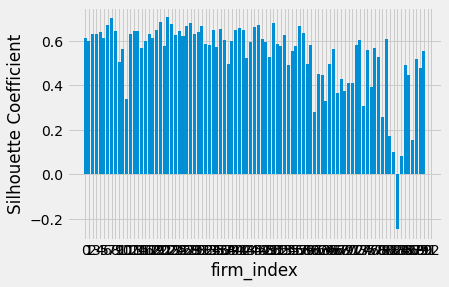

In [317]:
# It's some nan in the cure_sil_score 
show_silh_coef(rock_silh_score)

### Cure

In [318]:
cure_silh_score = silhouette(ratio_df_without_strings.values.tolist(), cure_clusters).process().get_score()

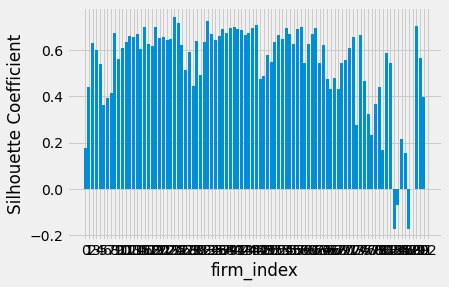

In [319]:
# It's some nan in the cure_sil_score 
show_silh_coef(cure_silh_score)

### K_Medoids

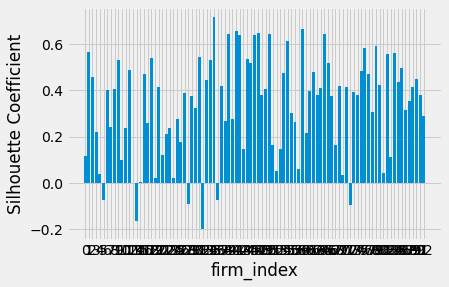

In [320]:
kmedoids_clusters_score = silhouette(ratio_df_without_strings.values.tolist(), kmedoids_clusters).process().get_score()
show_silh_coef(kmedoids_clusters_score)

### Birch

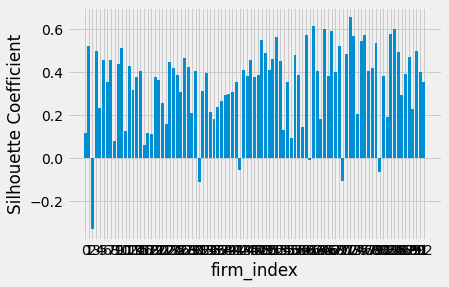

In [321]:
birch_clusters_score = silhouette(ratio_df_without_strings.values.tolist(), birch_clusters).process().get_score()
show_silh_coef(birch_clusters_score)

### K_means

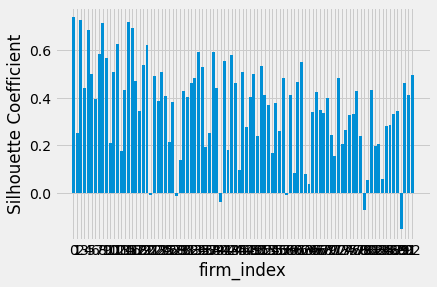

In [322]:
kmeans_clusters_score = silhouette(ratio_df_without_strings.values.tolist(), kmeans_clusters).process().get_score()
show_silh_coef(kmeans_clusters_score)